In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime

In [2]:
ufo_data = pd.read_csv('merged_ufo_elect_data.csv')

In [3]:

ufo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34525 entries, 0 to 34524
Data columns (total 17 columns):
Unnamed: 0              34525 non-null int64
date                    34349 non-null object
time                    34349 non-null object
year                    34525 non-null int64
city                    34349 non-null object
state_x                 34349 non-null object
shape                   33138 non-null object
duration (seconds)      34348 non-null object
duration (hours/min)    33196 non-null object
comments                34330 non-null object
date posted             34349 non-null object
latitude                34349 non-null float64
longitude               34349 non-null float64
candidate               9434 non-null object
party                   9434 non-null object
candidatevotes          9434 non-null float64
totalvotes              9434 non-null float64
dtypes: float64(4), int64(2), object(11)
memory usage: 4.5+ MB


In [6]:
filt_objs = []
for i, obj in ufo_data.iterrows():
    if pd.notna(obj["year"]) and pd.notna(obj["totalvotes"]) and pd.notna(obj["state_x"]):
        filt_objs.append(obj)
    

In [7]:
df = pd.DataFrame(filt_objs)

In [8]:
df.head()

,Unnamed: 0,date,time,year,city,state_x,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,candidate,party,candidatevotes,totalvotes
41,41,1976-10-10,20:30,1976,washougal,WA,oval,60,1 minute,Three extremely large lights hanging above nea...,2/7/2014,45.582778,-122.352222,"Ford, Gerald",republican,777732.0,1555534.0
69,69,1980-10-10,19:00,1980,houston,TX,sphere,180,3 min,Sphere&#44 No lights&#44 moving through neigh...,4/16/2005,29.763056,-95.363056,"Reagan, Ronald",republican,2510705.0,4541636.0
70,70,1980-10-10,22:00,1980,dallas,TX,unknown,300,5 minutes,Strange shape shifting craft of pure light ene...,10/28/2002,32.783333,-96.800000,"Reagan, Ronald",republican,2510705.0,4541636.0
71,71,1980-10-20,18:00,1980,corpus christi (maliki beach),TX,disk,300,5min,METALIC RED PORTHOLES HOVERED OFFSHORE AT DUSK...,8/30/1999,27.800278,-97.396111,"Reagan, Ronald",republican,2510705.0,4541636.0
72,72,1980-10-20,19:00,1980,dallas,TX,triangle,2700,30-45 min,We were in a boat fishing at Lake Ray Hubbard&...,4/27/2004,32.783333,-96.800000,"Reagan, Ronald",republican,2510705.0,4541636.0


In [9]:
states = set()
for i, obj in df.iterrows():
    states.add(obj["state_x"])
    
years = set()
for i, obj in df.iterrows():
    years.add(obj["year"])

In [10]:
# table = {}
year_sums = []
years = sorted(list(years))
for year in years:
    year_sum = 0
    state_dic = set()
    for i, obj in df.iterrows():
        if int(obj["year"]) == int(year):
            if obj["state_x"] not in state_dic and pd.notna(obj["totalvotes"]):
                year_sum += int(obj["totalvotes"])
                state_dic.add(obj["state_x"])
                
    year_sums.append(year_sum)

# print(years)
# print(year_sums)

### Sightings increasing over year?


In [13]:
year_counts = {}

sightings = []

for i, obj in ufo_data.iterrows():
    if pd.notna(obj["date"]):
        sightings.append(obj)

accounts = pd.DataFrame(sightings)

In [14]:
for i, obj in accounts.iterrows():
    if obj["year"] not in year_counts.keys():
        year_counts[obj["year"]] = 1
    else:
        year_counts[obj["year"]] += 1

# print(year_counts)

<Container object of 77 artists>

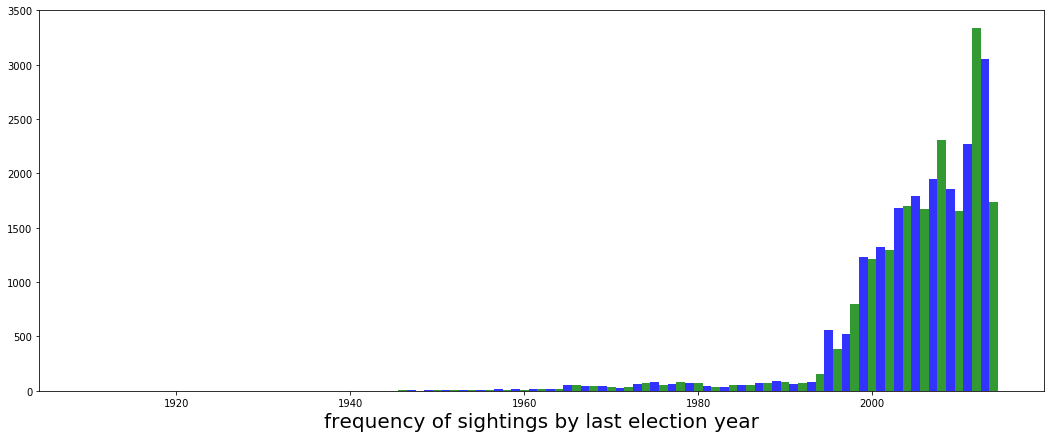

In [15]:
tups = sorted(year_counts.items()) 
# print(tups)
x, y = zip(*tups)
plt.rcParams["figure.figsize"] = (18,7)
plt.xlabel("frequency of sightings by last election year", fontsize=20)
plt.bar(x, y, color=["green", "blue"], alpha=.8, width=1)

In [16]:
# data from https://en.wikipedia.org/wiki/Voter_turnout_in_the_United_States_presidential_elections#:~:text=Note%3A%20The%20Bipartisan%20Policy%20Center,62.3%25%3B%20and%202012%2057.5%25.
turnout = [ (1944,  48026000), (1948,  48834000), (1952,61552000),
           (1956,62027000), (1960, 68836000), (1964,70098000), (1968, 73027000),
           (1972, 77625000), (1976, 81603000), (1980, 86497000),(1984, 92655000),
           (1988, 91587000), (1992,104600000), (1996,96390000), (2000, 105594000),
           (2004, 122349000), (2008, 131407000), (2012, 129235000), (2016, 138847000)
          ]

year_turn, num_turn = zip(*turnout)


<Container object of 19 artists>

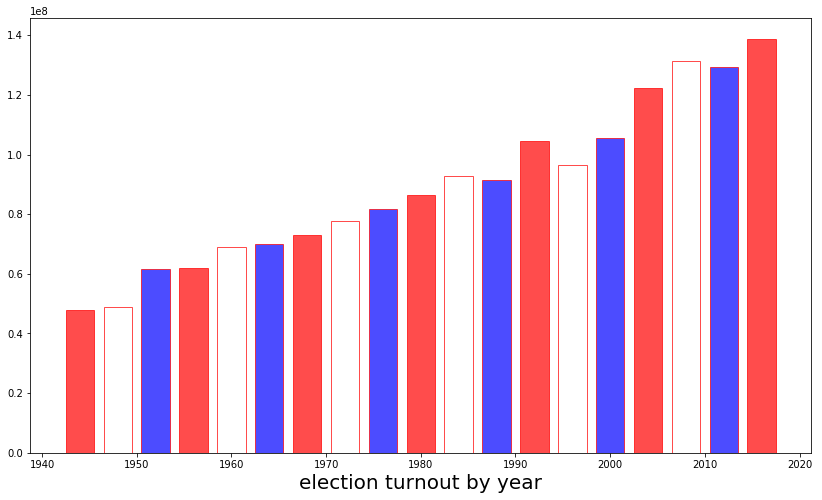

In [17]:
plt.rcParams["figure.figsize"] = (14,8)
plt.xlabel("election turnout by year", fontsize=20)
plt.bar(year_turn, num_turn, color=["red", "white", "blue"], width=3, edgecolor="red", alpha=.7)

In [18]:
visits = []
for tup in tups:
    if tup[0] in year_turn:
        visits.append(tup[1])

In [19]:
elect = []
i = 0
while i < len(visits):
    row = [visits[i], year_turn[i], num_turn[i]]
    elect.append(row)
    i += 1
    
elect_df = pd.DataFrame(elect, columns=["visits", "year", "turnout_total"])

In [20]:
elect_df

,visits,year,turnout_total
0,2,1944,48026000
1,1,1948,48834000
2,7,1952,61552000
3,8,1956,62027000
4,11,1960,68836000
5,16,1964,70098000
6,43,1968,73027000
7,34,1972,77625000
8,53,1976,81603000
9,71,1980,86497000


In [21]:
corelation = elect_df.corr()
print(corelation)

                 visits      year  turnout_total
visits         1.000000  0.738996       0.801308
year           0.738996  1.000000       0.980699
turnout_total  0.801308  0.980699       1.000000


In [22]:
shape_counts = {} # cleaning out junk
for i, obj in accounts.iterrows():
    if obj["shape"] != "other" and obj["shape"] != "nan" and obj["shape"] != "unknown" and obj["shape"] != "changing" and type(obj["shape"]) == str:
        if obj["shape"] not in shape_counts.keys():
            shape_counts[obj["shape"]] = 1
        else:
            shape_counts[obj["shape"]] += 1

# print(shape_counts)


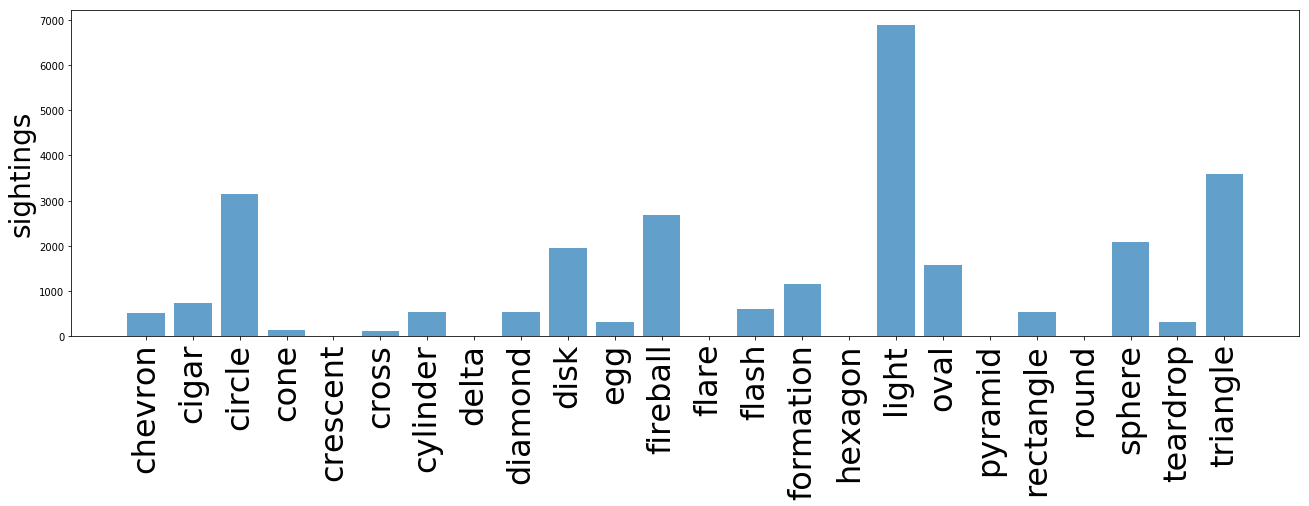

In [23]:
shape_x = list(shape_counts.keys())
shape_y = list(shape_counts.values())
shape_x = [str(shape) for shape in shape_x]
# print(shape_y)
# print(shape_x)
plt.rcParams["figure.figsize"] = (22,6)
plt.xticks(rotation=90, fontsize=32)
plt.ylabel("sightings", fontsize=28)
plt.bar(shape_x, shape_y, alpha=.7)
plt.savefig("sightings_shape_hist.png")


In [24]:

import seaborn as sns
# ax = sns.heatmap([[i for i, shape in enumerate(shape_x)], shape_y], linewidth=0.7, xticklabels=shape_x)
# # plt.imshow([[i for i, shape in enumerate(shape_x)], shape_y], cmap='viridis', interpolation='nearest')

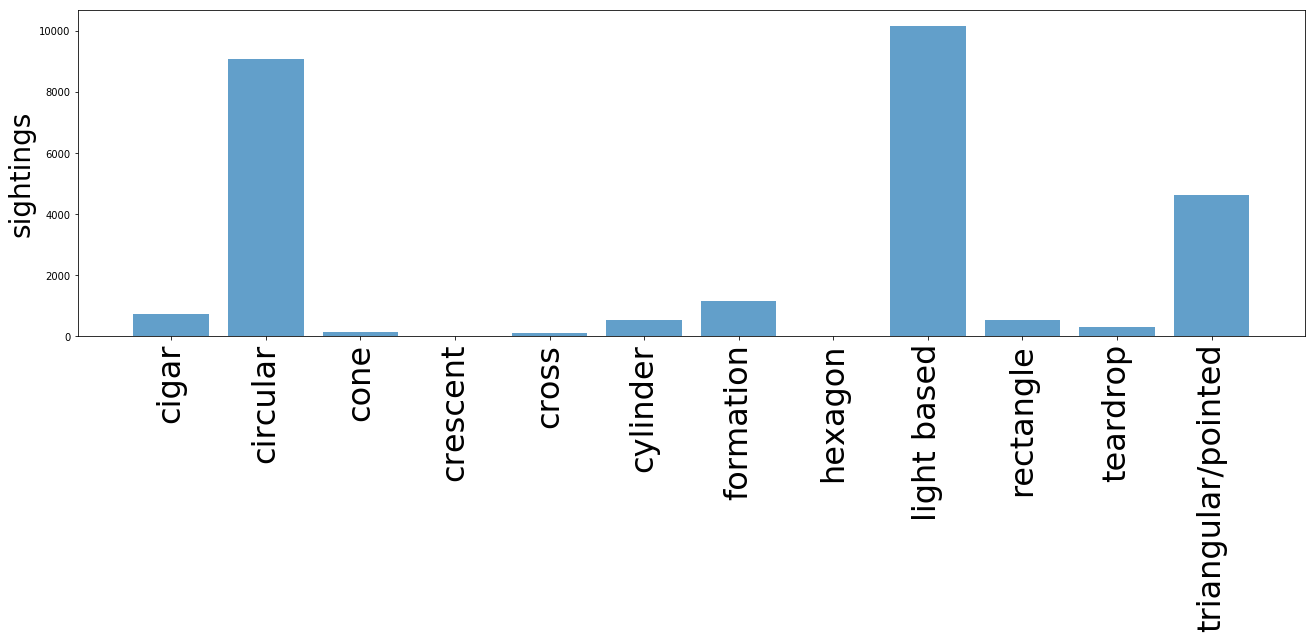

In [25]:
circular = ["circle", "sphere", "egg", "oval", "round", "disk"]
triangular_pointed = ["triangle", "delta", "diamond", "pyramid", "chevron"]
light_based = ["light", "fireball", "flash", "flare"]

def shape_map(shape): # grouping like shapes 
    if shape in circular:
        return "circular"
    elif shape in triangular_pointed:
        return "triangular/pointed"
    elif shape in light_based:
        return "light based"
    else:
        return shape
    

shape_year = {}
for i, obj in accounts.iterrows():
    if obj["shape"] != "other" and obj["shape"] != "nan" and obj["shape"] != "unknown" and obj["shape"] != "changing" and type(obj["shape"]) == str:
        if obj["year"] not in shape_year.keys():
            shape_year[int(obj["year"])] = {shape_map(obj["shape"]) : 1}
        elif shape_map(obj["shape"]) not in shape_year[int(obj["year"])].keys():
            shape_year[int(obj["year"])][shape_map(obj["shape"])] = 1
        else:
            shape_year[int(obj["year"])][shape_map(obj["shape"])] += 1


shape_counts_grouped = {}
for i, obj in accounts.iterrows():
    if obj["shape"] != "other" and obj["shape"] != "nan" and obj["shape"] != "unknown" and obj["shape"] != "changing" and type(obj["shape"]) == str:
        if shape_map(obj["shape"]) not in shape_counts_grouped.keys():
            shape_counts_grouped[shape_map(obj["shape"])] = 1
        else:
            shape_counts_grouped[shape_map(obj["shape"])] += 1
            
shape_x = list(shape_counts_grouped.keys())
shape_y = list(shape_counts_grouped.values())
shape_x = [str(shape) for shape in shape_x]
# print(shape_y)
# print(shape_x)
plt.rcParams["figure.figsize"] = (22,6)
plt.xticks(rotation=90, fontsize=32)
plt.ylabel("sightings", fontsize=28)
plt.bar(shape_x, shape_y, alpha=.7)
plt.savefig("sightings_shape_hist.png")

In [26]:
import collections
ordered_by_year = collections.OrderedDict(sorted(shape_year.items()))


df_shape_year = pd.DataFrame(ordered_by_year)
df_shape_year.head()


,1910,1925,1931,1936,1943,1944,1945,1946,1947,1948,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
cigar,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,...,44.0,36.0,48.0,62.0,35.0,27.0,34.0,41.0,51.0,27.0
circular,1.0,1.0,1.0,NaN,NaN,1.0,1.0,3.0,1.0,1.0,...,438.0,428.0,517.0,604.0,480.0,435.0,616.0,885.0,829.0,507.0
cone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,9.0,12.0,6.0,3.0,7.0,6.0,10.0,14.0,5.0
crescent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cross,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,6.0,5.0,9.0,12.0,11.0,5.0,9.0,13.0,7.0


In [27]:
# cleaning
df_shape_year = df_shape_year.fillna(0)

In [79]:
df_shape_year.head()

,1948,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012
cigar,0.0,0.0,0.0,1.0,4.0,1.0,1.0,0.0,2.0,2.0,5.0,35,84,126,118,69
circular,0.0,1.0,2.0,12.0,21.0,21.0,49.0,5.0,20.0,40.0,48.0,449,916,1421,1619,1376
cone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10,20,23,21,24
cross,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7,10,13,30,15
cylinder,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,30,66,92,90,72


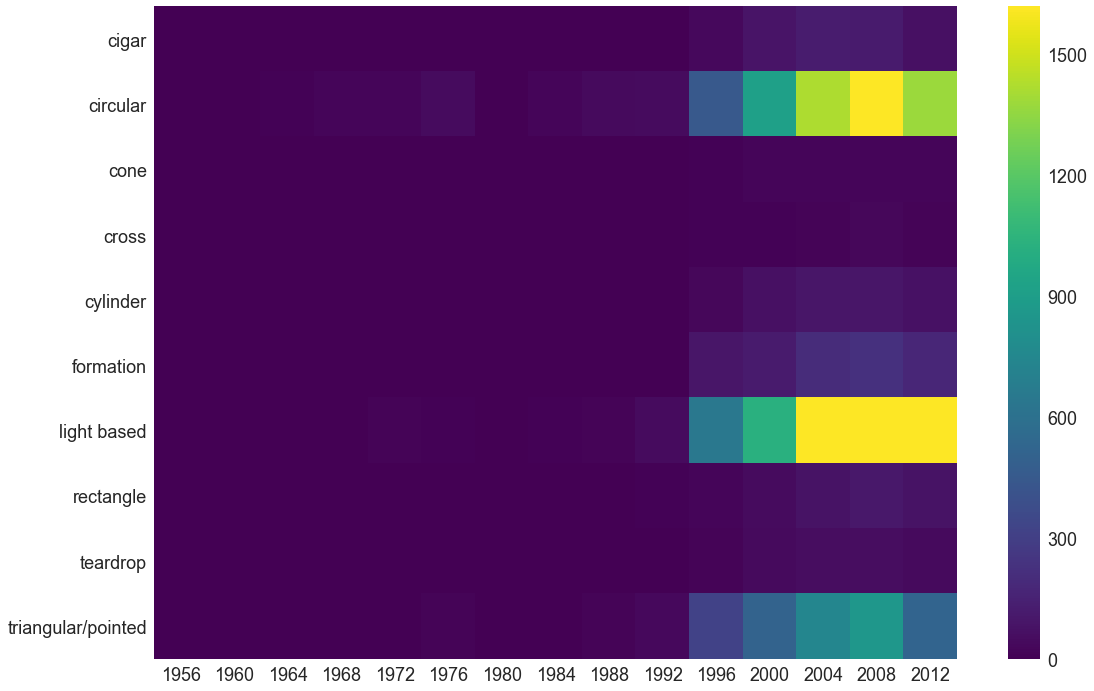

In [80]:
plt.rcParams["figure.figsize"] = (18,12)
sns.set(font_scale=1.8)
ax = sns.heatmap(df_shape_year.loc[:,1952:],cmap='viridis', robust=True)
plt.savefig("shape_year_heatmap.jpg")
# placing a maximum on the heat max teases out the earlier popularity of disk

In [81]:
## dividing each shape counts per year by that year's overall sightings
for i, obj in df_shape_year.iterrows():
    #print(obj)
    for j, count in enumerate(obj):
        year = df_shape_year.columns[j]
        
        #print(count, year)
        #print(df_shape_year.loc[i, df_shape_year.columns[j]]) # how to access the count
        
        counts_for_year = year_counts[year]
        df_shape_year.loc[i, df_shape_year.columns[j]] = count/counts_for_year
        
        #print("updated: ", df_shape_year.loc[i, df_shape_year.columns[j]])

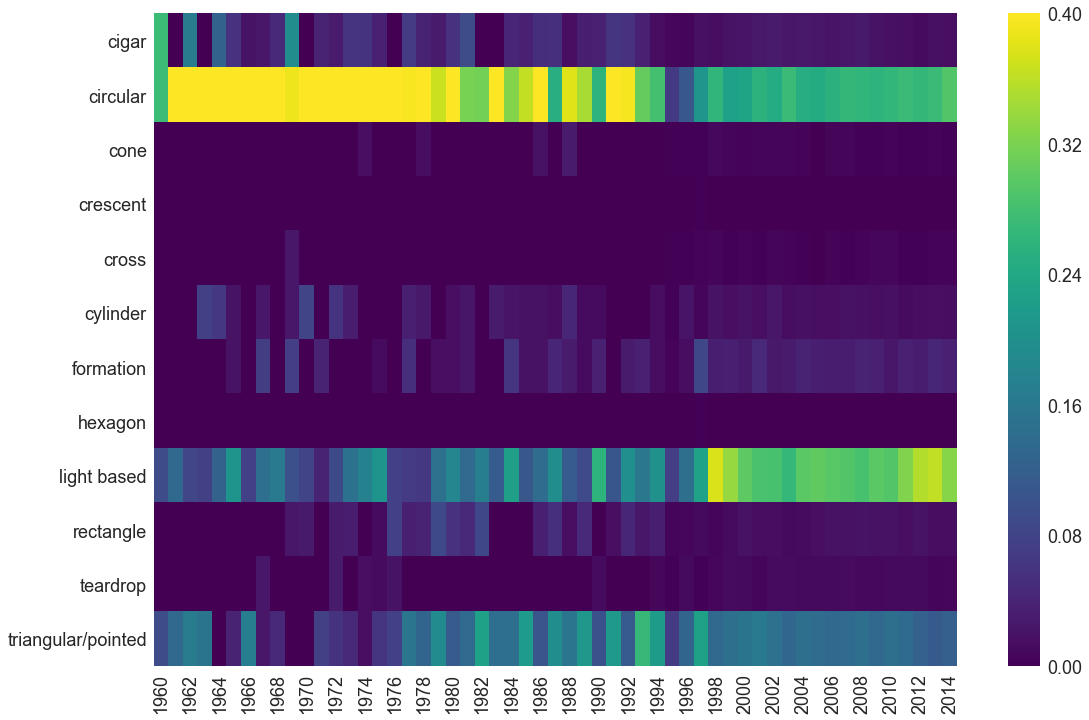

In [33]:
plt.rcParams["figure.figsize"] = (18,12)
sns.set(font_scale=1.8)
ax = sns.heatmap(df_shape_year.loc[:,1960:],cmap='viridis', vmax=.4)
plt.savefig("shape_year_heatmap.jpg")
#plotting the heatmap by fraction of all frequencies for a given year seems to show that while 
# circular stops being the dominant shape in the mid/late 90s, light based becomes more popular

# this illustrates similiar finding as shelby's graph, but with grouped shapes

In [34]:
state_year = {}
for i, obj in accounts.iterrows():
    if int(obj["year"]) not in state_year.keys():
        state_year[int(obj["year"])] = {obj["state_x"] : 1}
    elif obj["state_x"] not in state_year[int(obj["year"])].keys():
        state_year[int(obj["year"])][obj["state_x"]] = 1
    else:
        state_year[int(obj["year"])][obj["state_x"]] += 1


In [35]:
od_state = collections.OrderedDict(sorted(state_year.items()))


df_state_year = pd.DataFrame(od_state)
df_state_year = df_state_year.fillna(0)
df_state_year.head()

,1910,1925,1931,1936,1942,1943,1944,1945,1946,1947,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
AK,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,11.0,4.0,8.0,8.0,9.0,15.0,34.0,37.0,21.0
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,25.0,24.0,28.0,15.0,12.0,18.0,34.0,36.0,29.0
AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,16.0,11.0,20.0,14.0,21.0,20.0,31.0,20.0,7.0
AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,98.0,69.0,70.0,91.0,67.0,52.0,99.0,113.0,113.0,88.0
CA,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,266.0,280.0,317.0,401.0,333.0,264.0,318.0,356.0,359.0,241.0


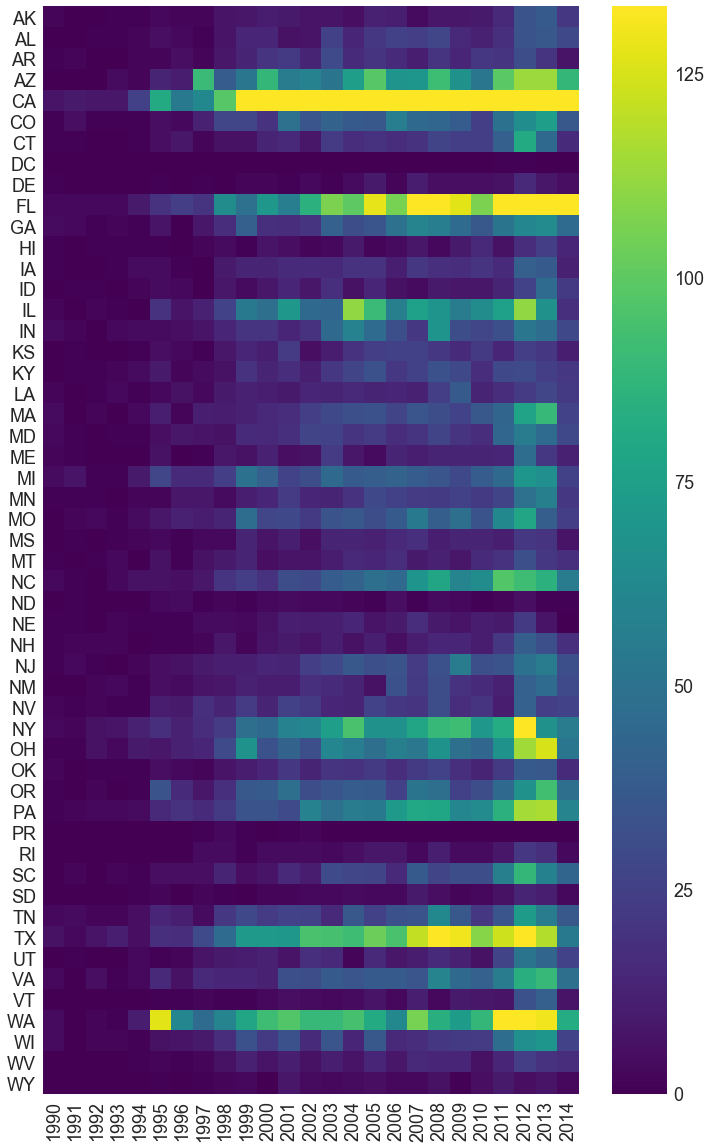

In [37]:
plt.rcParams["figure.figsize"] = (12,20)
sns.set(font_scale=1.8)
ax = sns.heatmap(df_state_year.loc[ : ,1990:],cmap='viridis', robust=True)
plt.savefig("state_year_heatmap.jpg")

In [38]:
state_shape = {}
for i, obj in accounts.iterrows():
    if obj["shape"] != "other" and obj["shape"] != "nan" and obj["shape"] != "unknown" and obj["shape"] != "changing" and type(obj["shape"]) == str:
        if obj["state_x"] not in state_shape.keys():
            state_shape[obj["state_x"]] = {shape_map(obj["shape"]) : 1}
        elif shape_map(obj["shape"])  not in state_shape[obj["state_x"]].keys():
            state_shape[obj["state_x"]][shape_map(obj["shape"]) ] = 1
        else:
            state_shape[obj["state_x"]][shape_map(obj["shape"]) ] += 1

In [39]:
df_state_shape = pd.DataFrame(state_shape)
df_state_shape = df_state_shape.fillna(0)
df_state_shape.head()


,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
cigar,3.0,7.0,7.0,29.0,83.0,12.0,16.0,0.0,0.0,43.0,...,2.0,17.0,49.0,6.0,17.0,4.0,25.0,15.0,4.0,1.0
circular,67.0,105.0,82.0,350.0,1440.0,186.0,126.0,0.0,27.0,687.0,...,15.0,190.0,506.0,82.0,224.0,36.0,422.0,132.0,70.0,18.0
cone,1.0,1.0,1.0,7.0,17.0,3.0,1.0,0.0,0.0,10.0,...,0.0,2.0,7.0,2.0,2.0,1.0,9.0,3.0,1.0,0.0
crescent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
cross,0.0,2.0,1.0,6.0,19.0,4.0,3.0,0.0,0.0,5.0,...,0.0,2.0,7.0,2.0,2.0,2.0,4.0,1.0,1.0,0.0


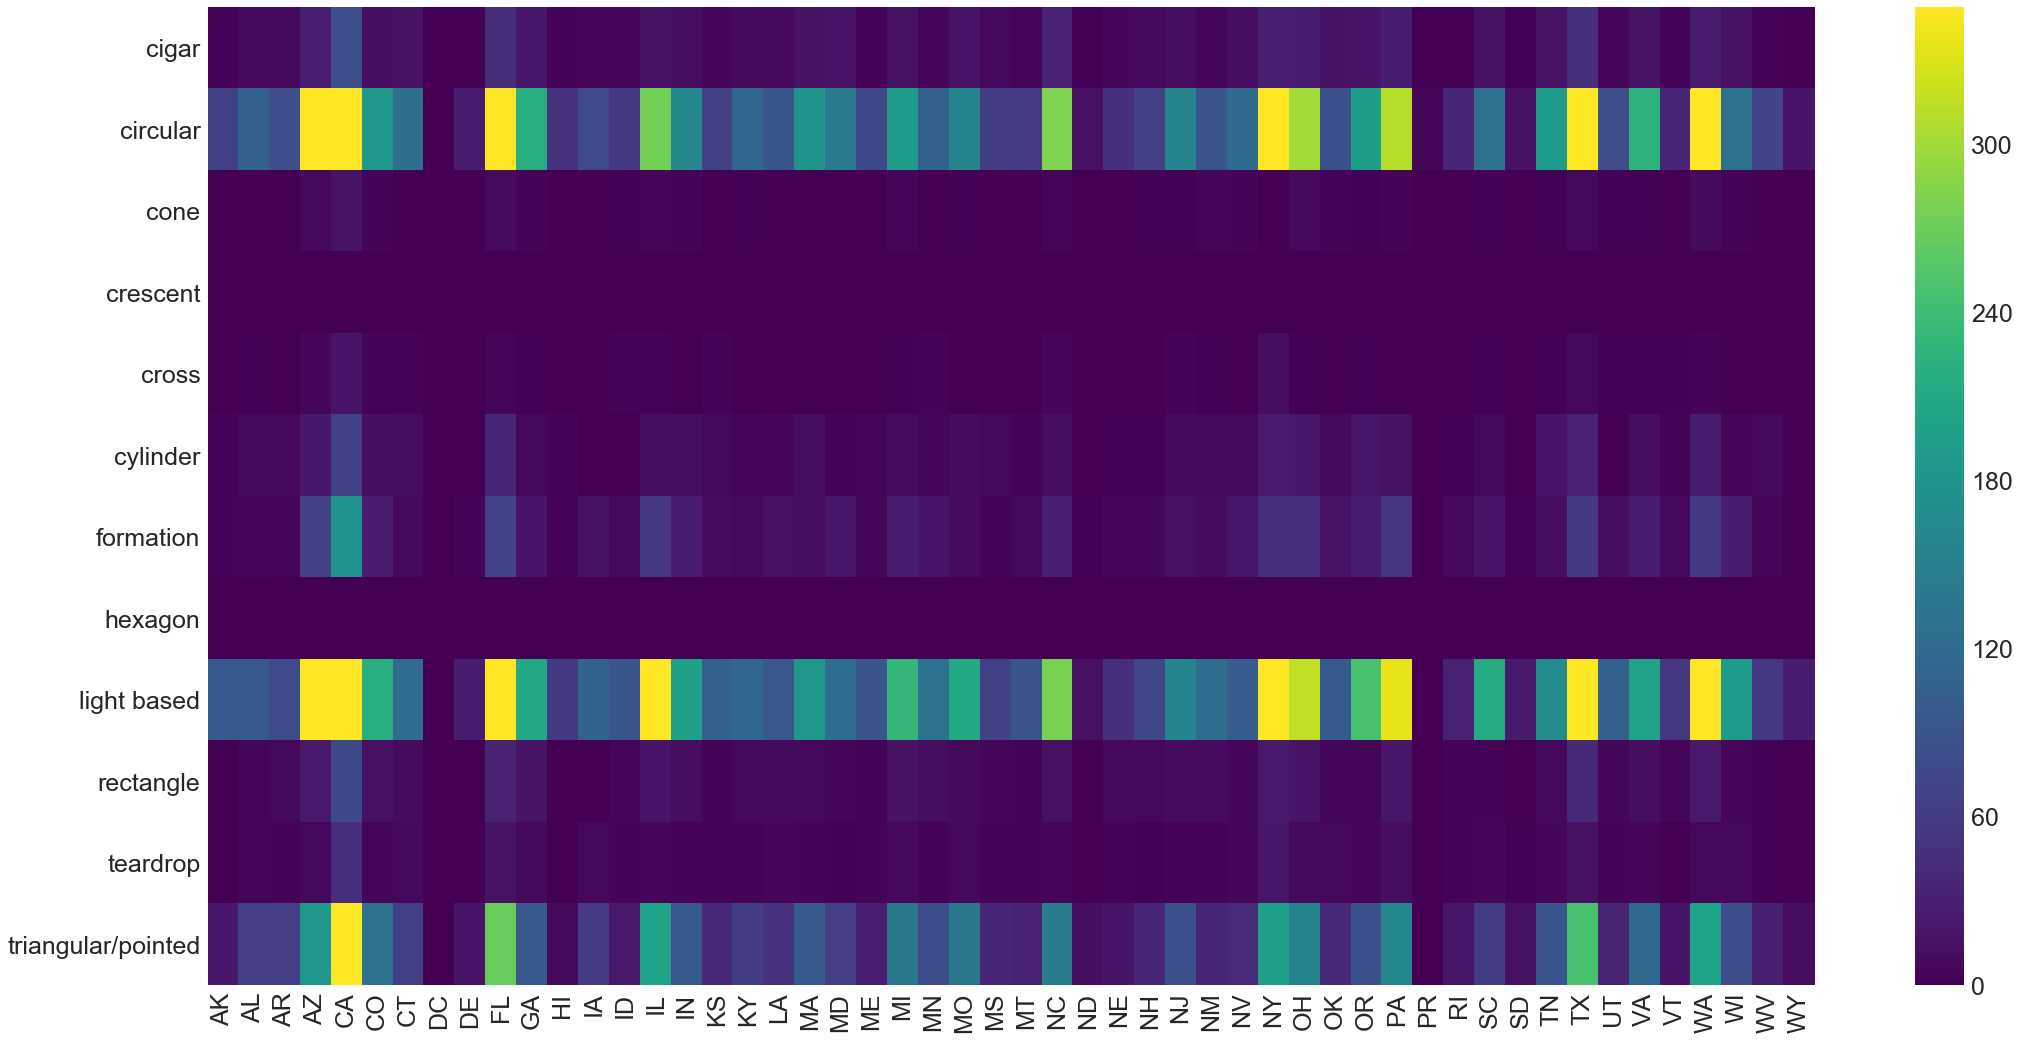

In [40]:
plt.rcParams["figure.figsize"] = (36,18)
sns.set(font_scale=2.5)
ax = sns.heatmap(df_state_shape,cmap='viridis', robust=True)
plt.savefig("state_shape_heatmap.jpg")